<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/section01_scRNAseq_intro.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __Section 1:__ Introduction to scRNA-seq



In [1]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

Cloning into 'single-cell-lectures'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 385 (delta 107), reused 166 (delta 72), pack-reused 176 (from 1)
Receiving objects: 100% (385/385), 217.26 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Updating files: 100% (30/30), done.


In [2]:
!pip install scanpy==1.9.3

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=8ce8d15dcd7a42f71093508f6bc0377fe316e0c96074b27e0e45c7cb5c8e646e
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install leidenalg==0.10.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.5 MB/s eta 0:00:00


In [4]:
!pip install matplotlib==3.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [5]:
import scanpy as sc; sc.set_figure_params(dpi=200)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/u

In [6]:
adata = sc.read_h5ad('single-cell-lectures/data/GSM3305227_Tumor_1_Full.h5ad')  # for Colab users, path to repository
#adata = sc.read_h5ad('data/GSM3305227_Tumor_1_Full.h5ad')  # for local users, read from data directory

In [7]:
adata.raw = adata.copy()  # save un-manipulated state to .raw attribute of AnnData object

#adata is the class variable for copy and paste data.
#need to save as raw file* since we want raw data, not normalized

In [8]:
adata.X  # working array of counts data
#allows you to see the matrix


array([[ 0.,  1.,  1., ...,  3., 29.,  0.],
       [ 0.,  2.,  0., ...,  8., 26.,  0.],
       [ 0.,  2.,  1., ...,  4., 19.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [10]:
# normalize, transform, and scale counts

sc.pp.normalize_total(adata)
adata.X = np.arcsinh(adata.X).copy()
sc.pp.scale(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [11]:
adata.X

array([[-0.1278341 , -0.12335118, -0.0827167 , ..., -0.25178203,
        -0.08181714, -0.17158478],
       [-0.10833985, -0.02477913, -0.21438928, ...,  0.03657895,
        -0.01235376, -0.14350624],
       [-0.23753989, -0.24493693,  0.19022009, ..., -0.15234707,
         0.07024814, -0.32871655],
       ...,
       [ 0.0231999 , -0.38237798,  0.04536492, ...,  0.1658896 ,
        -0.34149876,  0.04619932],
       [ 0.03134717,  0.32743326,  0.06131947, ...,  0.19337969,
         0.3432415 ,  0.05792763],
       [-0.01090912, -0.39588082, -0.02176814, ...,  0.04709077,
        -0.22219694, -0.00295672]], dtype=float32)

In [12]:
adata.var_names

Index(['0610006L08Rik', '0610007P14Rik', '0610009B22Rik', '0610009E02Rik',
       '0610009L18Rik', '0610009O20Rik', '0610010F05Rik', '0610010K14Rik',
       '0610011F06Rik', '0610012D04Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=25507)

In [15]:
adata.var['Mitochondrial'] = adata.var.index.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata,qc_vars=['Mitochondrial'],use_raw=True,inplace=True)
#This gets rid of mitochondria data

In [43]:
sc.pp.pca(adata,random_state=0)
#this is the principal component analysis. always keep random state = 0.

In [17]:
neighborhood_k = np.sqrt(adata.n_obs).astype(int)  # We have found that scaling the K to equal the square root of the total number of neighbors to be effective
sc.pp.neighbors(adata,n_neighbors=neighborhood_k,use_rep='X_pca',random_state=0)  # Calculate this KNN based off of the PCA distances

In [24]:
sc.tl.leiden(adata,resolution=0.5,random_state=0)  # Here we use a resolution of 2, which should yield 30+ clusters. This step may take a while.

In [25]:
# Differential gene expression testing using the .raw values
sc.tl.rank_genes_groups(adata,groupby='leiden',use_raw=True,n_genes=200,method='wilcoxon')

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementatio

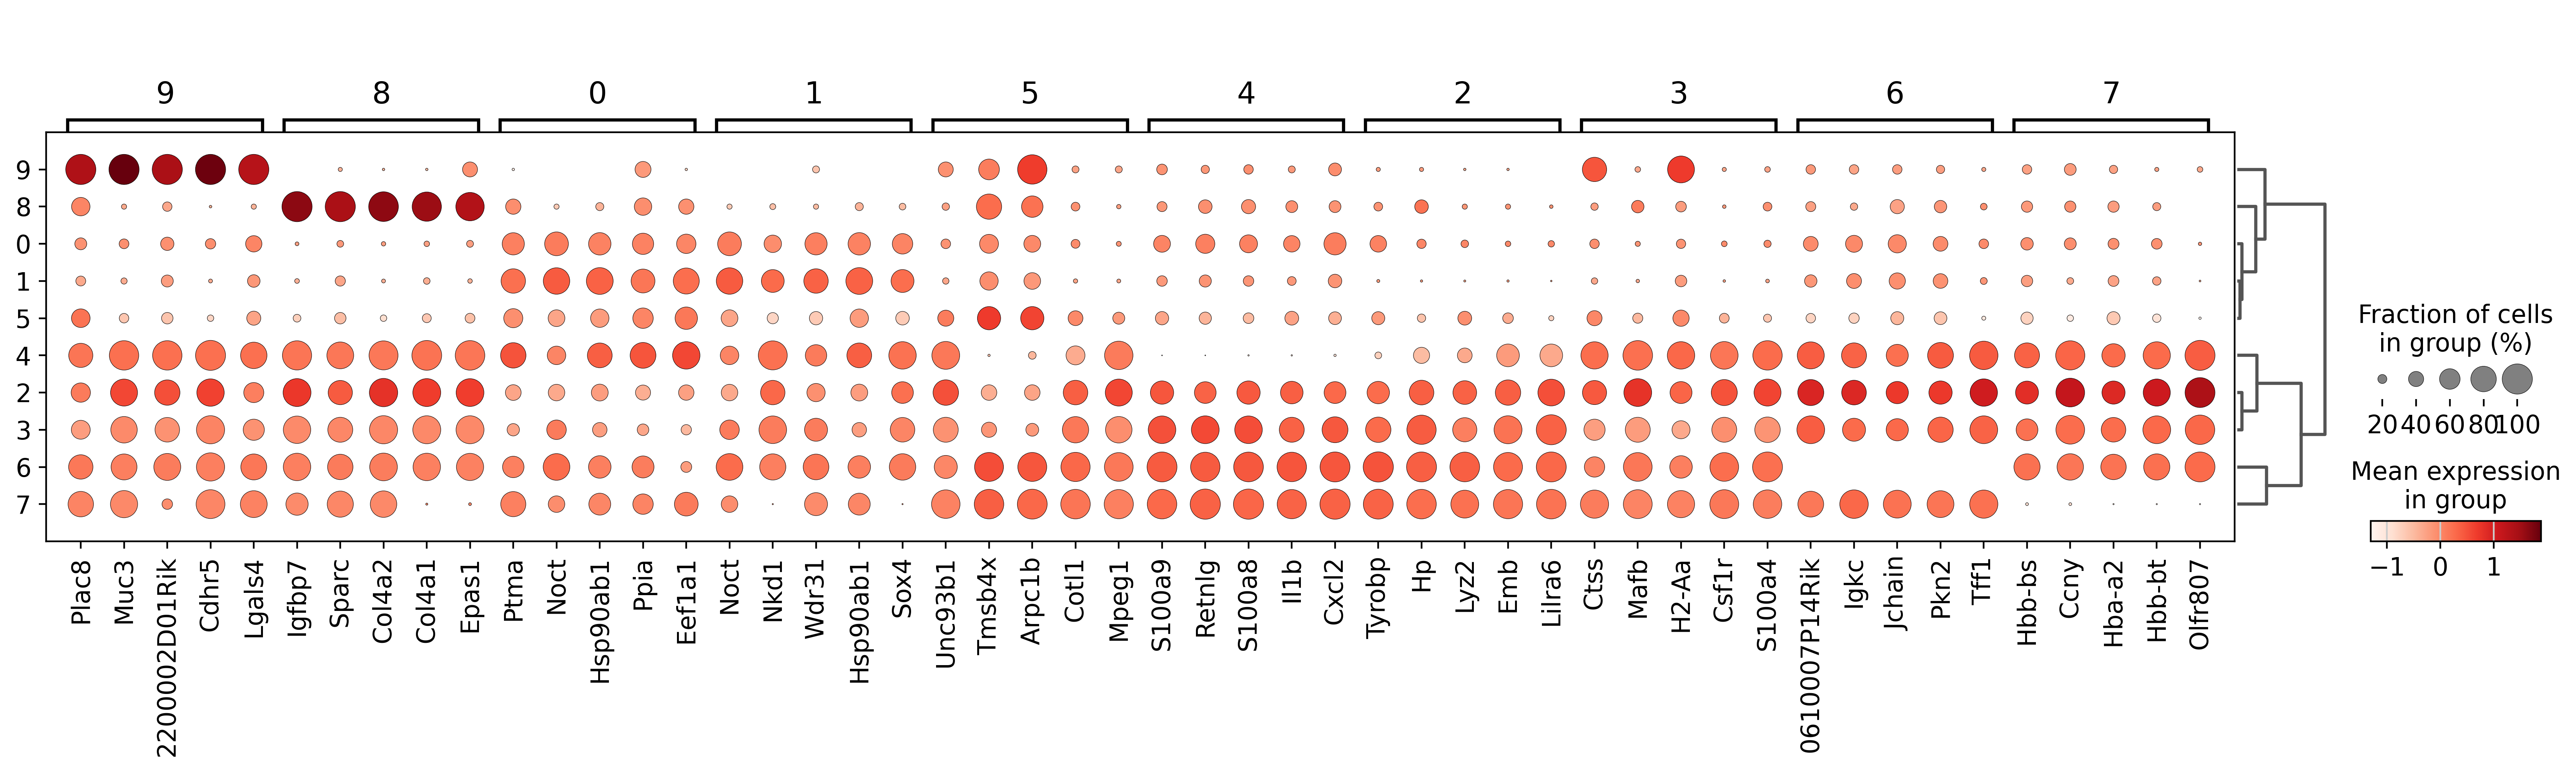

In [26]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, use_raw=False)

/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.11/dist-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementatio

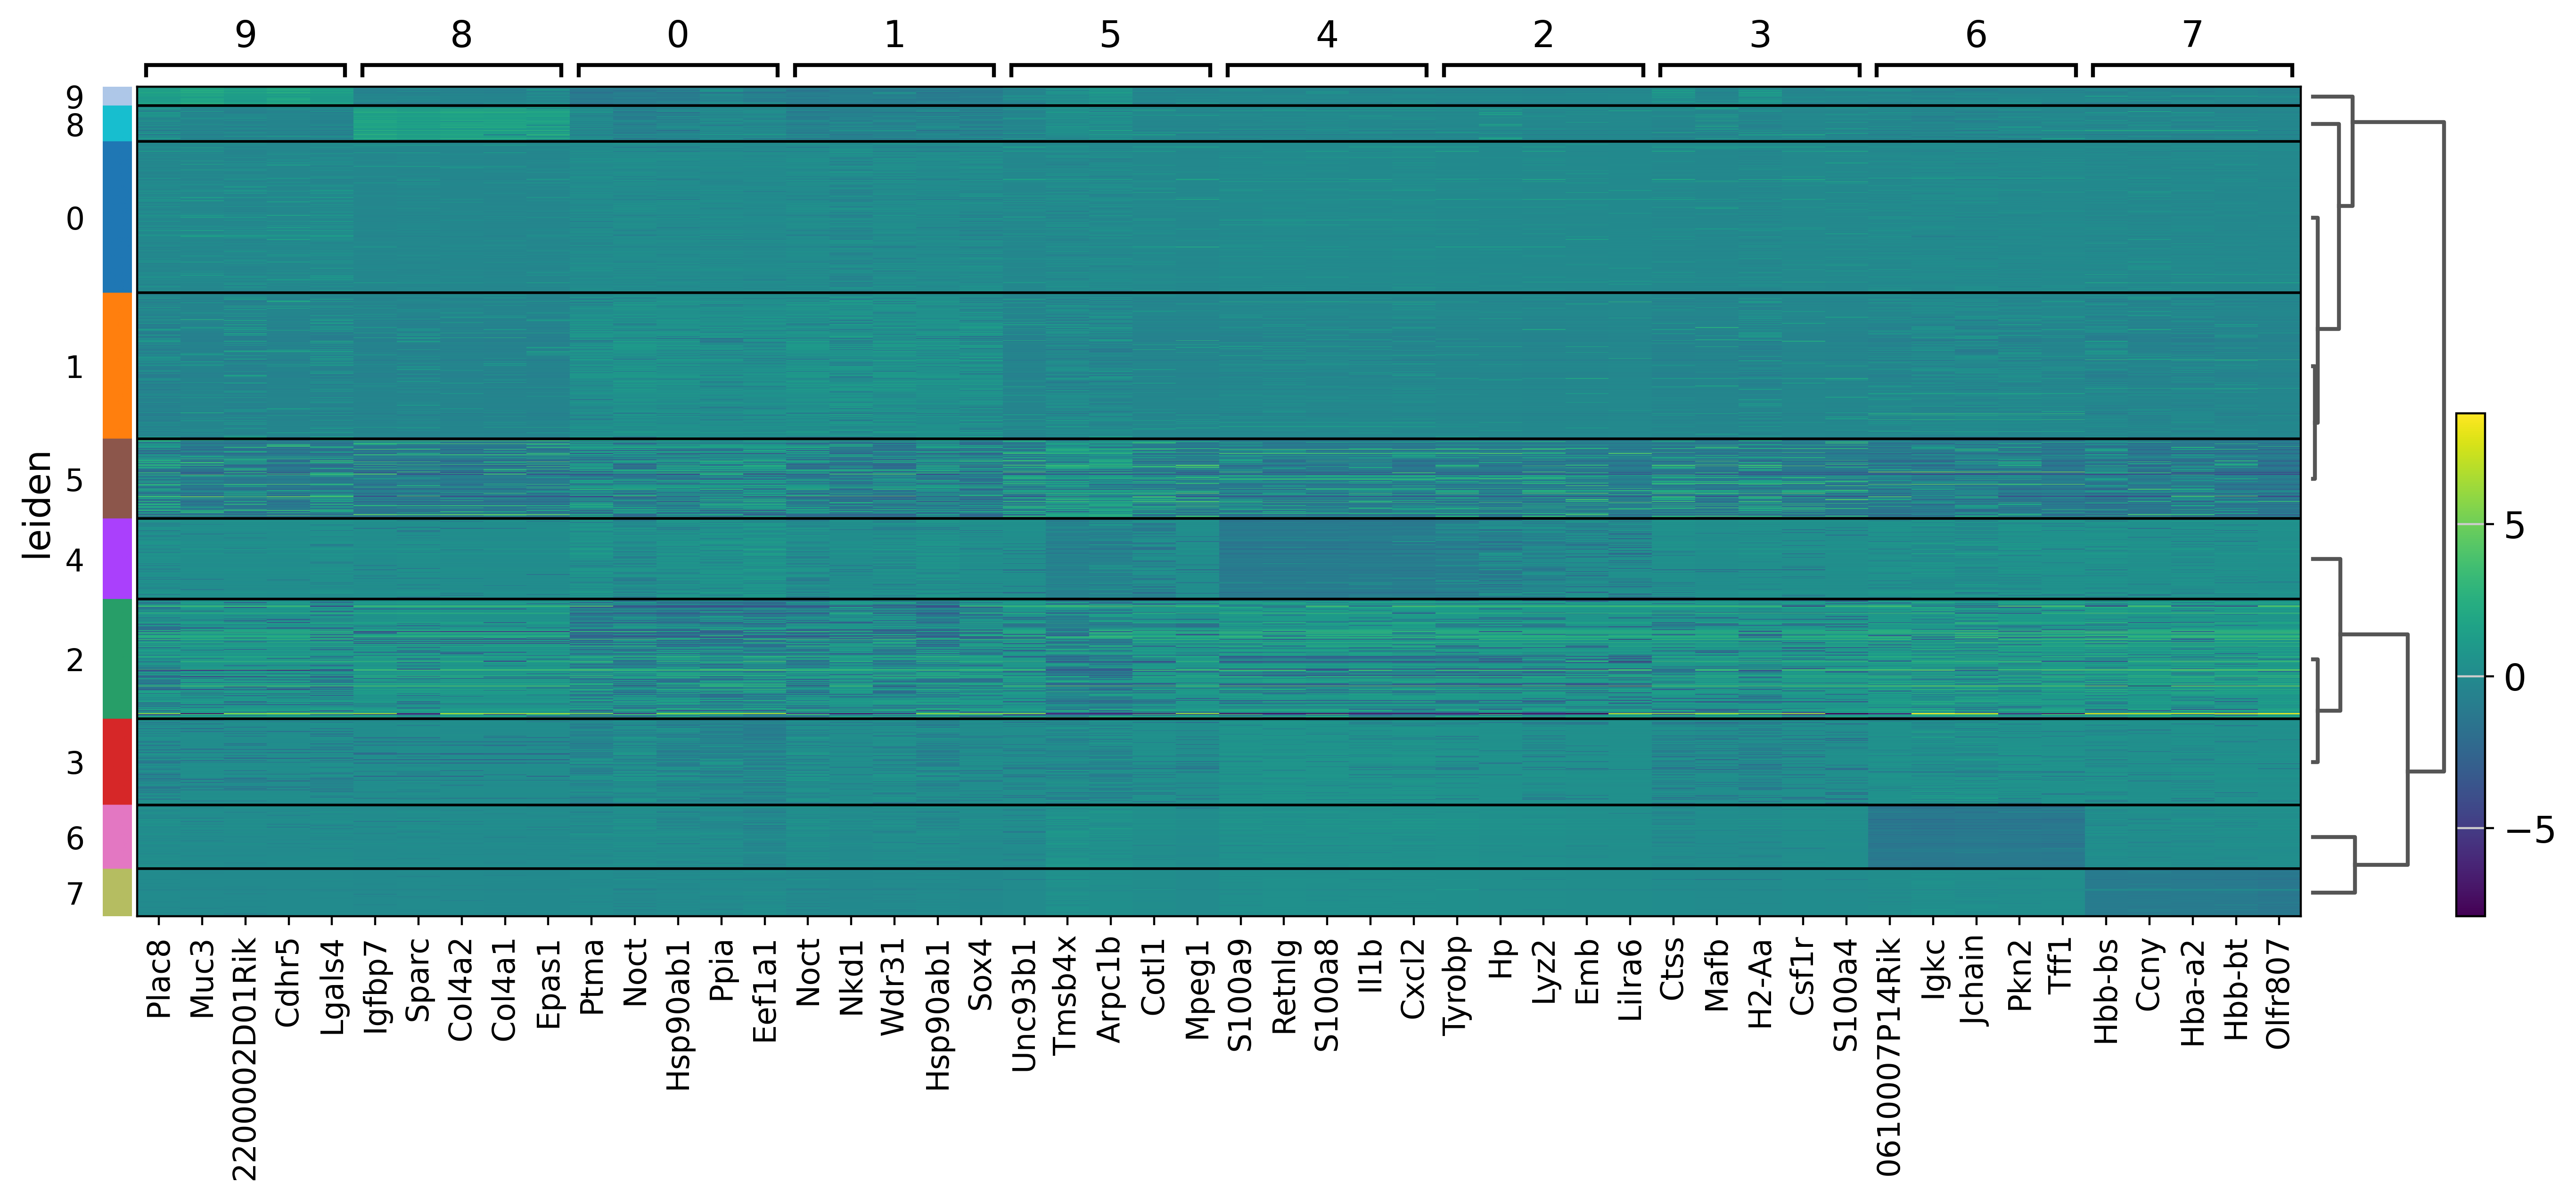

In [27]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, show_gene_labels=True, use_raw=False)

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:796: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.catplot(


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

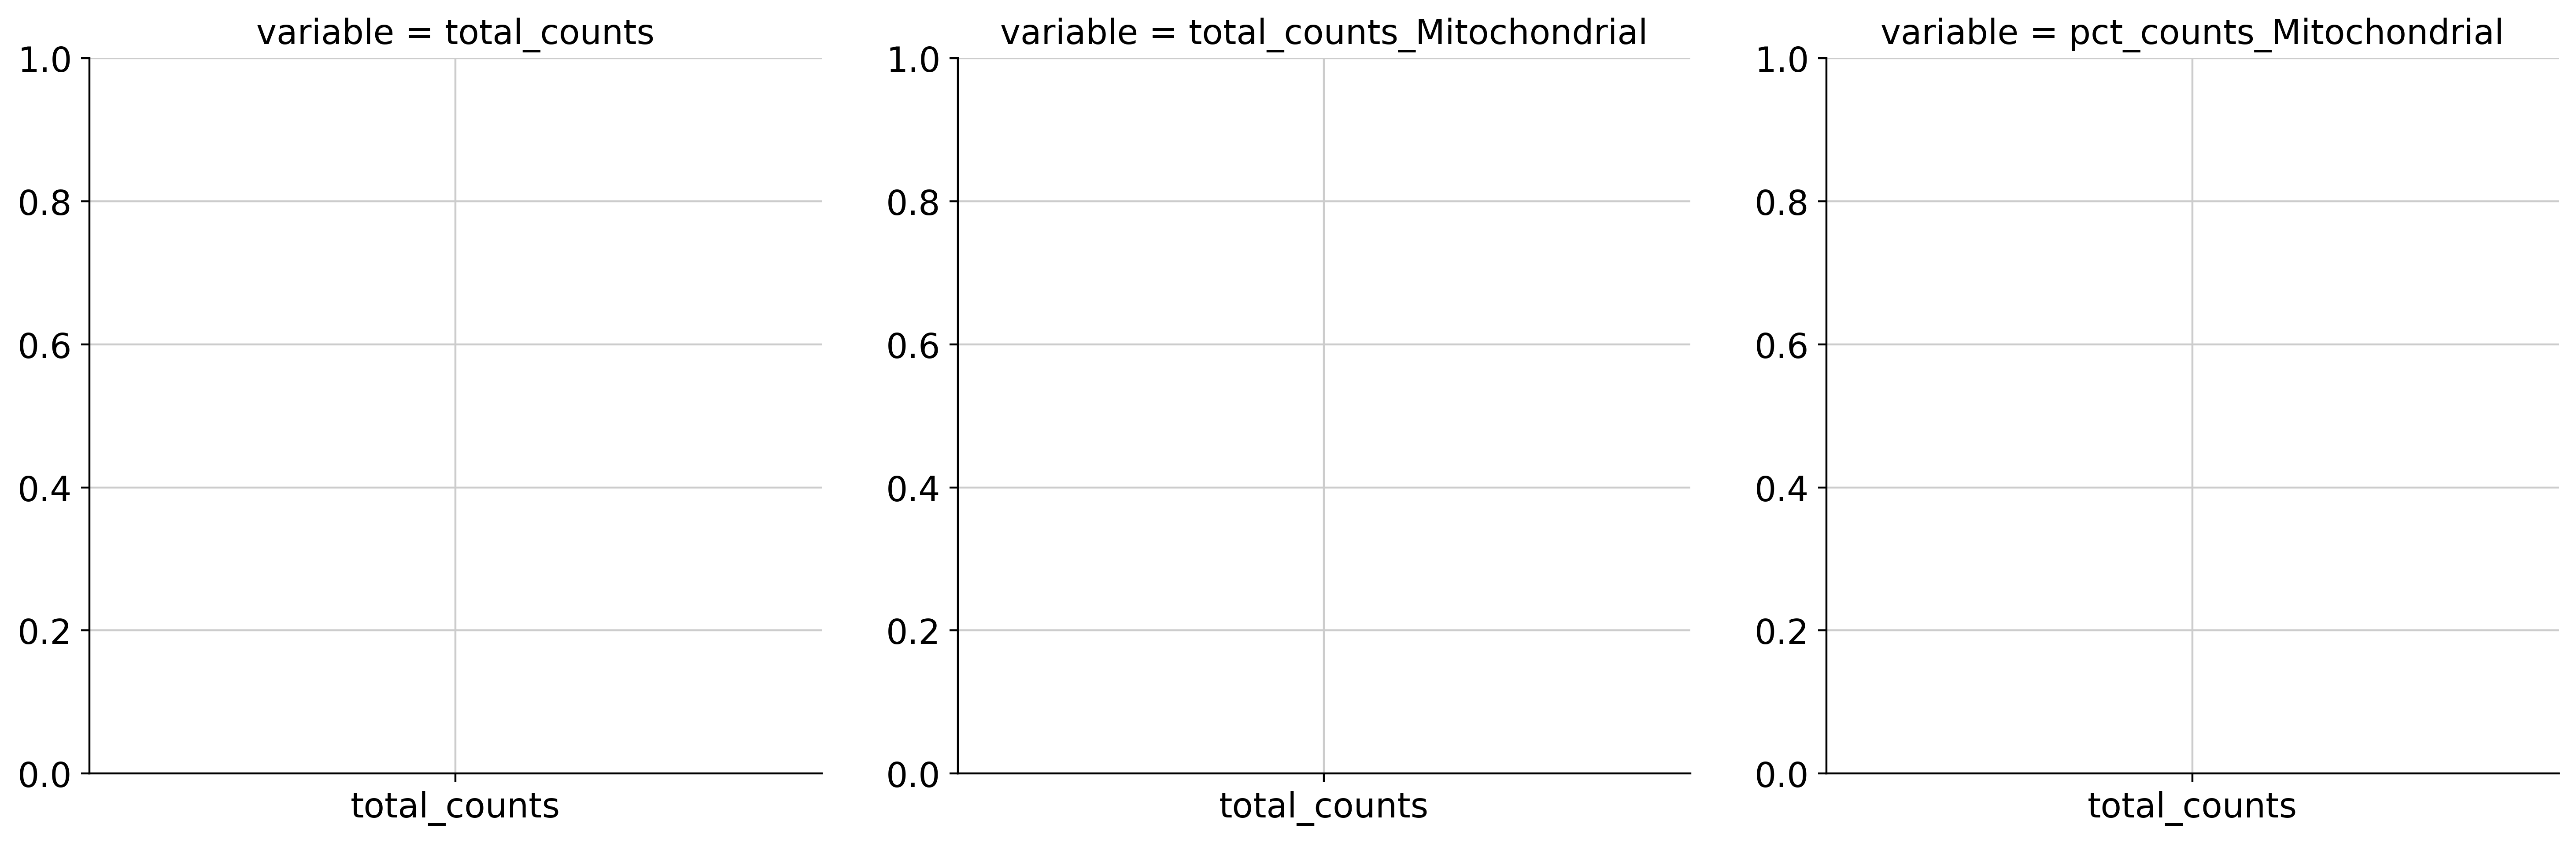

In [28]:
# if this do not work, try the cell below with pyplot panel formatting
sc.pl.violin(adata, keys=['total_counts','total_counts_Mitochondrial','pct_counts_Mitochondrial'], jitter=0.4, multi_panel=True)

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


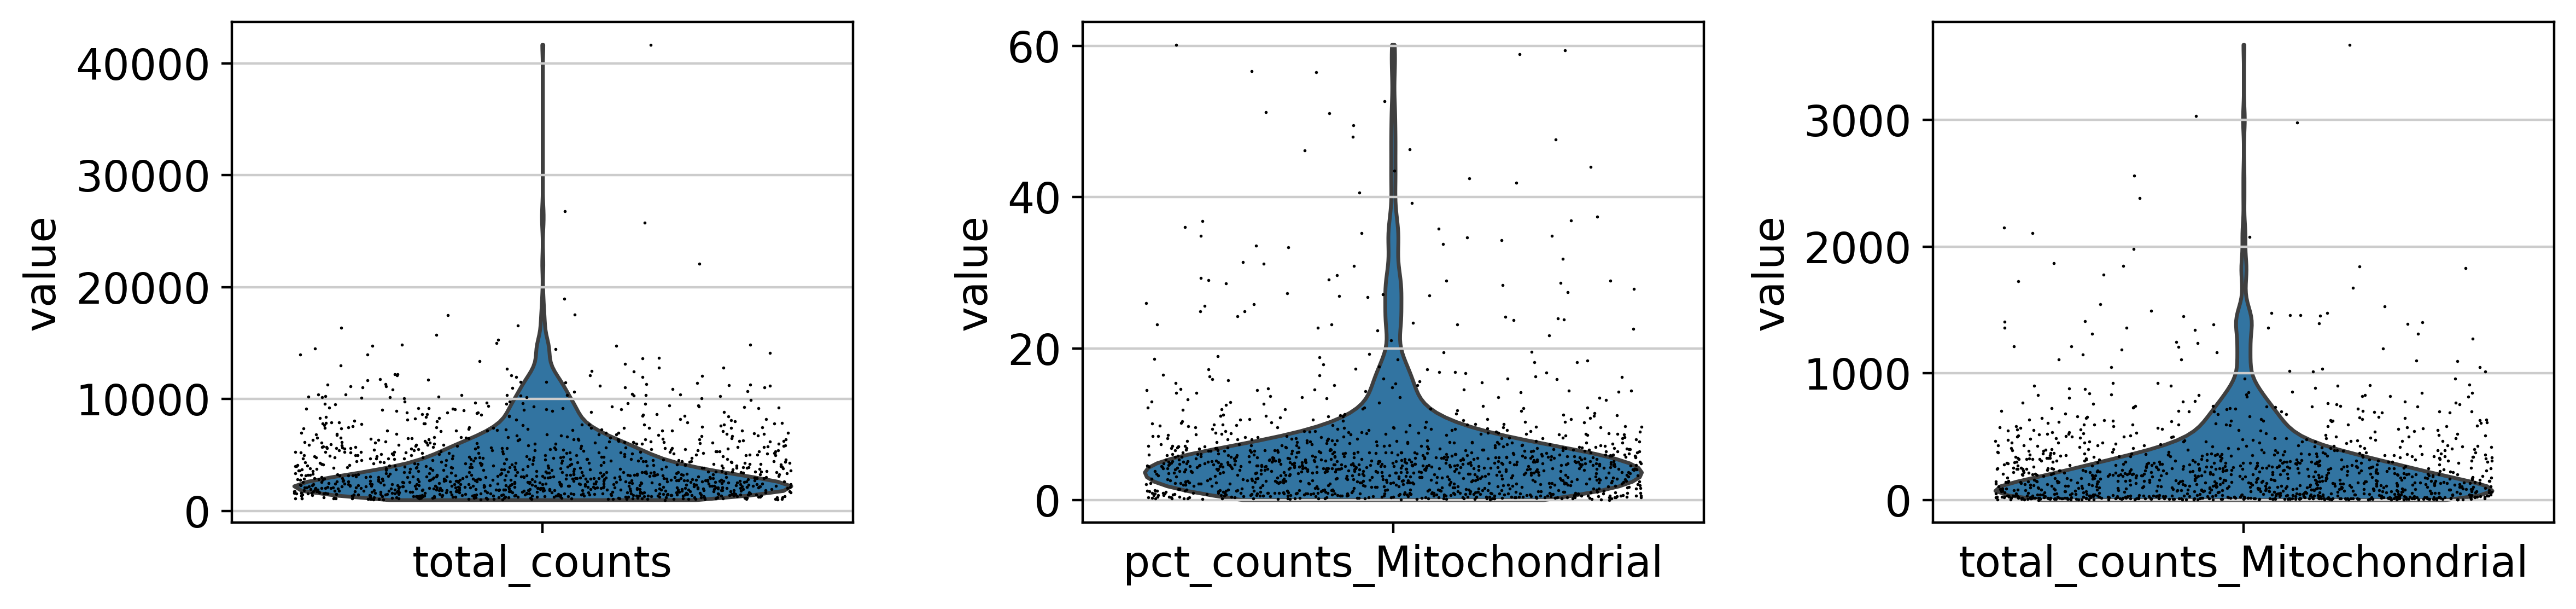

In [29]:
# creating a figure panel with 1 row and 3 columns ( 3 sub-axes )
f,axls = plt.subplots( nrows = 1, ncols = 3, figsize = [12,3])

# generate the subpanels with scanpy and passing the axes to scanpy
sc.pl.violin(adata,  keys = 'total_counts',  jitter=0.4, show = False, ax = axls[0] )
sc.pl.violin(adata,  keys = 'pct_counts_Mitochondrial',  jitter=0.4, show = False, ax = axls[1] )
sc.pl.violin(adata,  keys = 'total_counts_Mitochondrial',  jitter=0.4 , show = False, ax = axls[2])

# format the figure
plt.tight_layout()

# show the figure
plt.show()

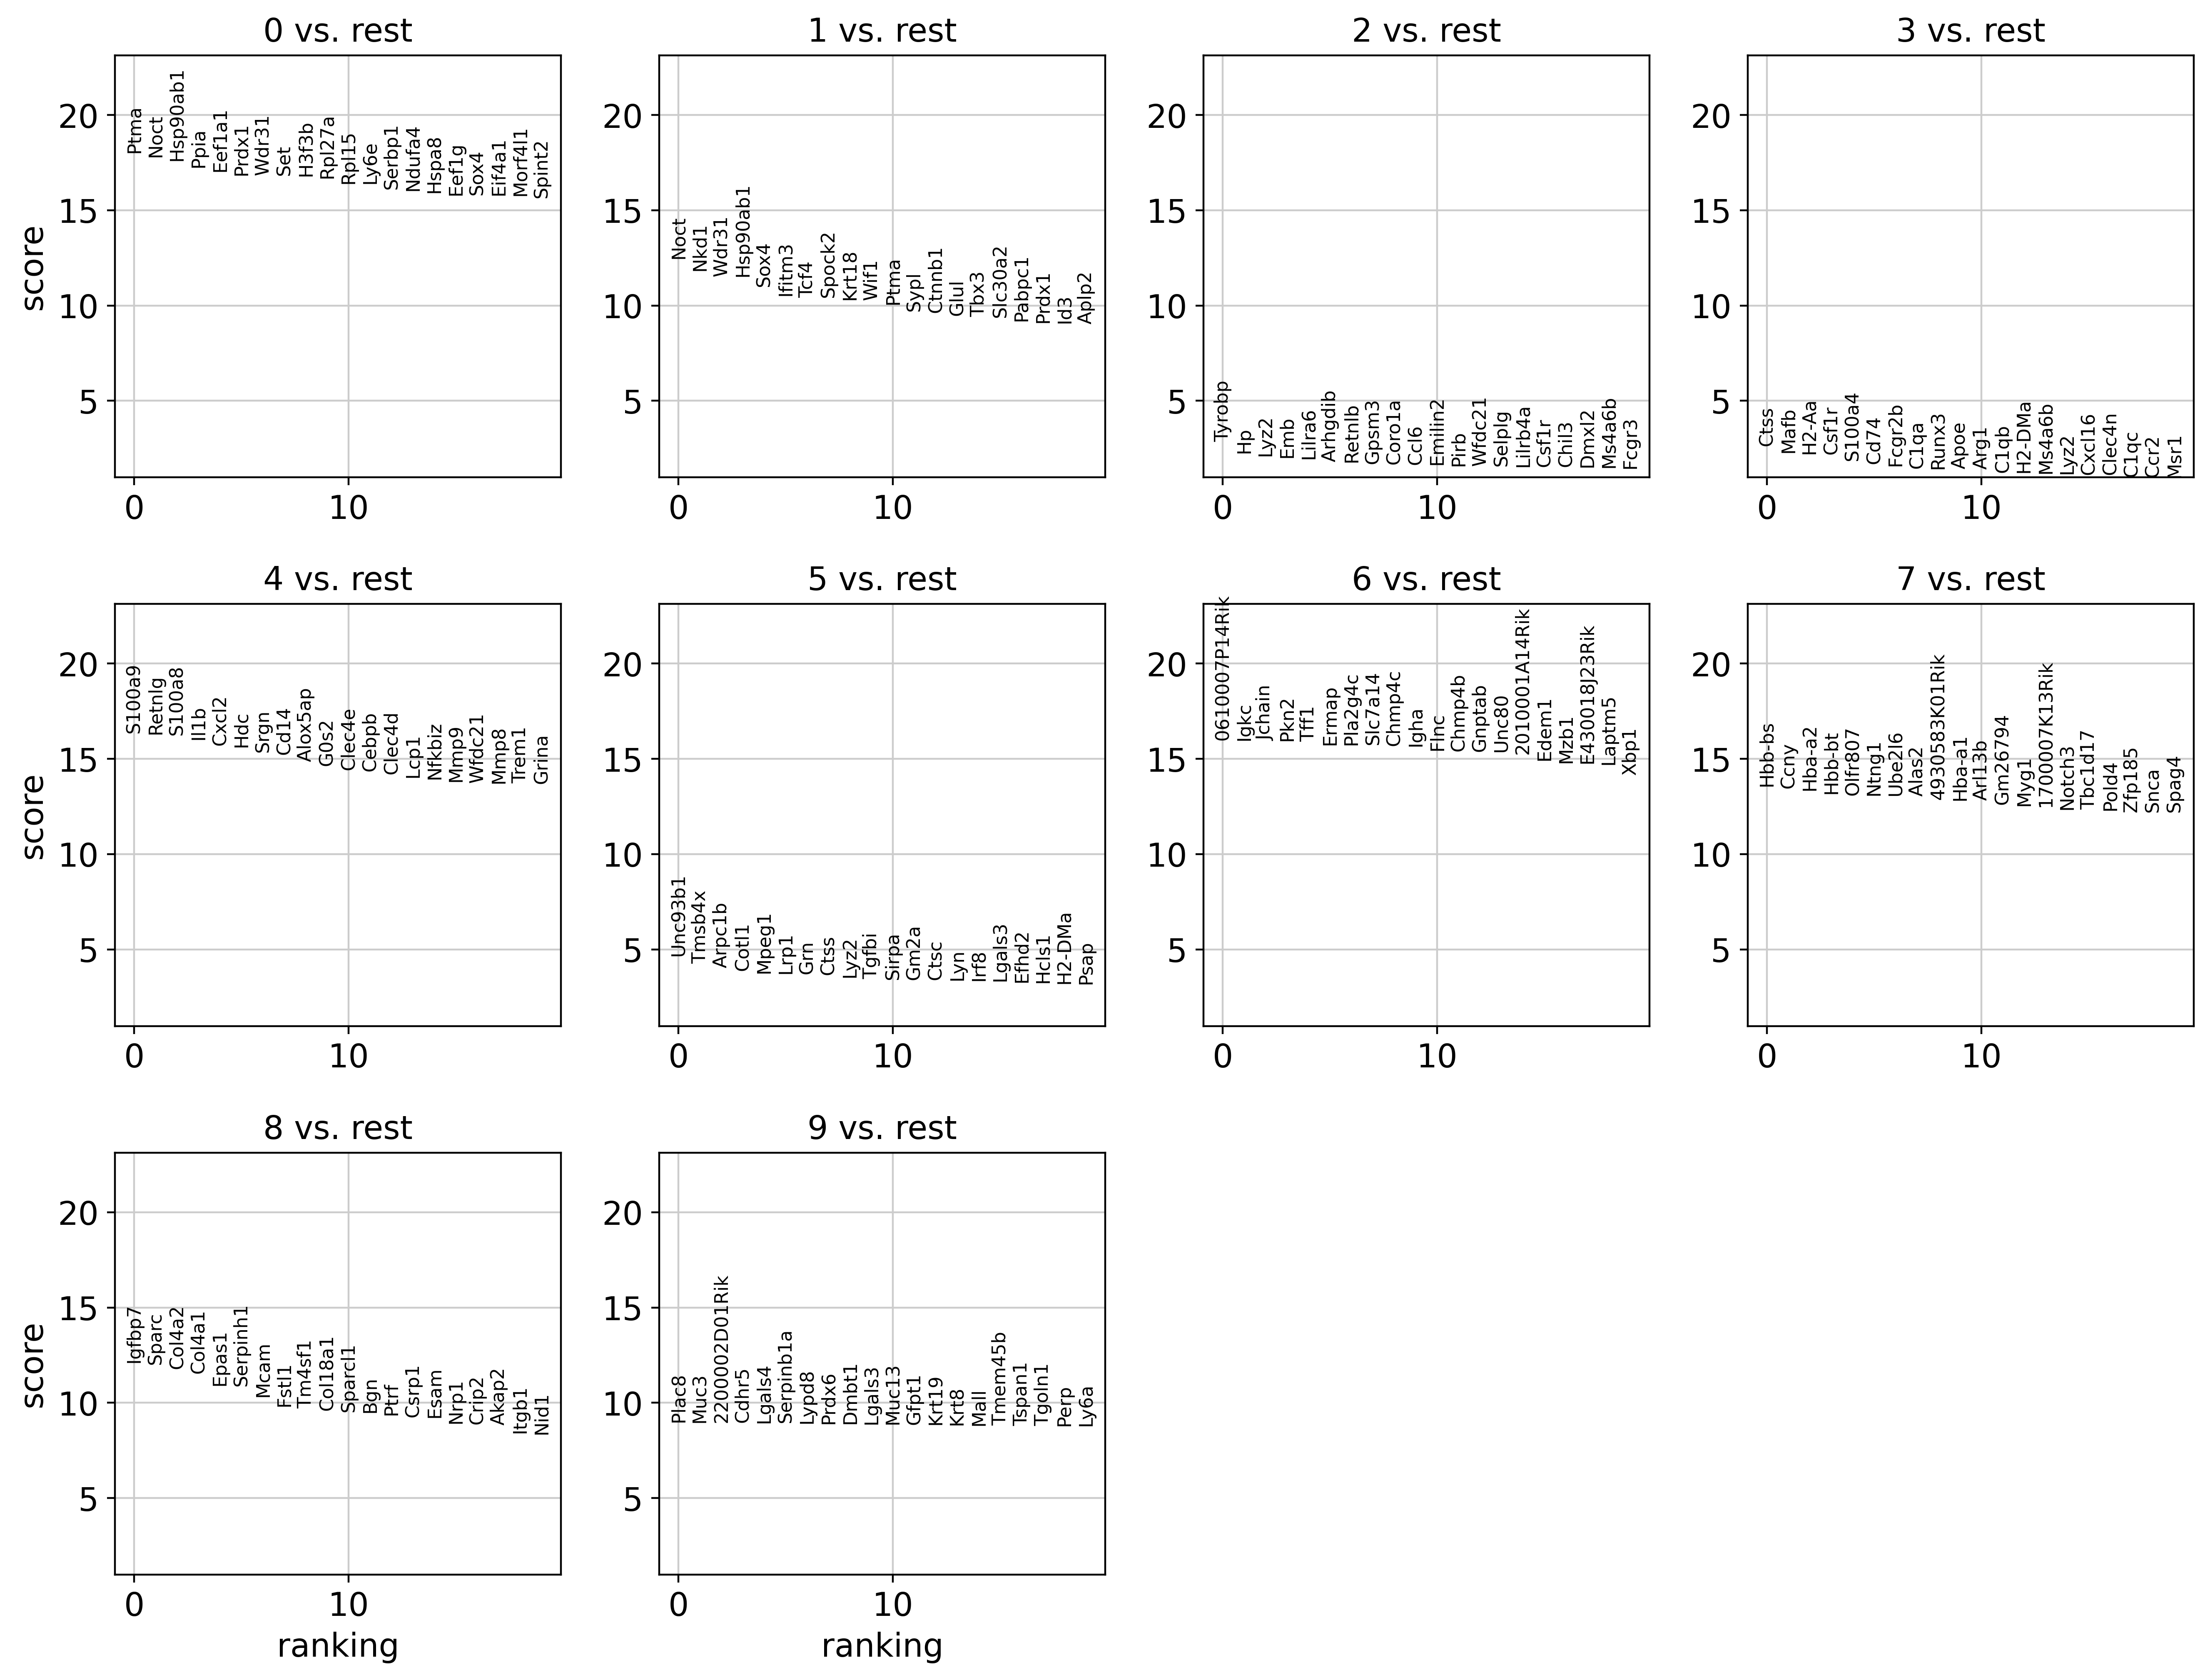

In [30]:
#Show differential gene expression results
sc.pl.rank_genes_groups(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


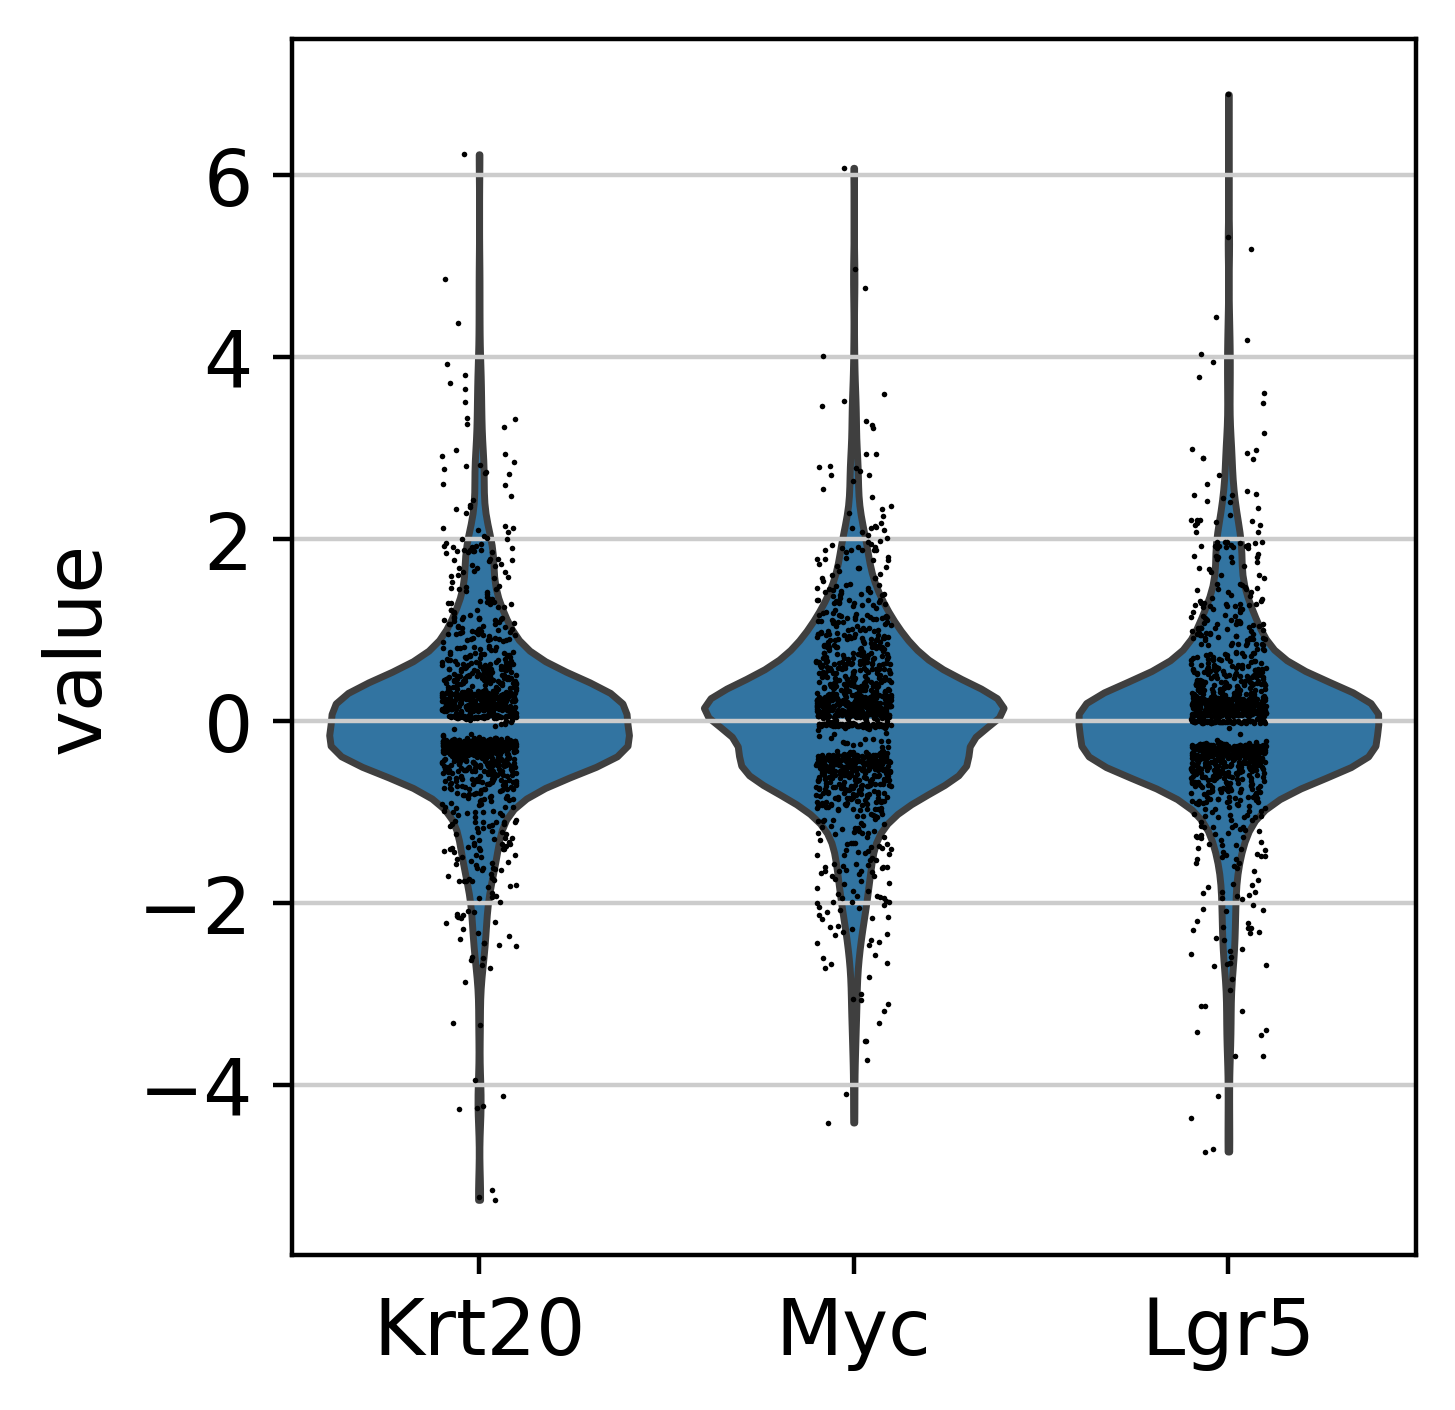

In [31]:
sc.pl.violin(adata, keys=['Krt20','Myc','Lgr5'], use_raw=False)

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

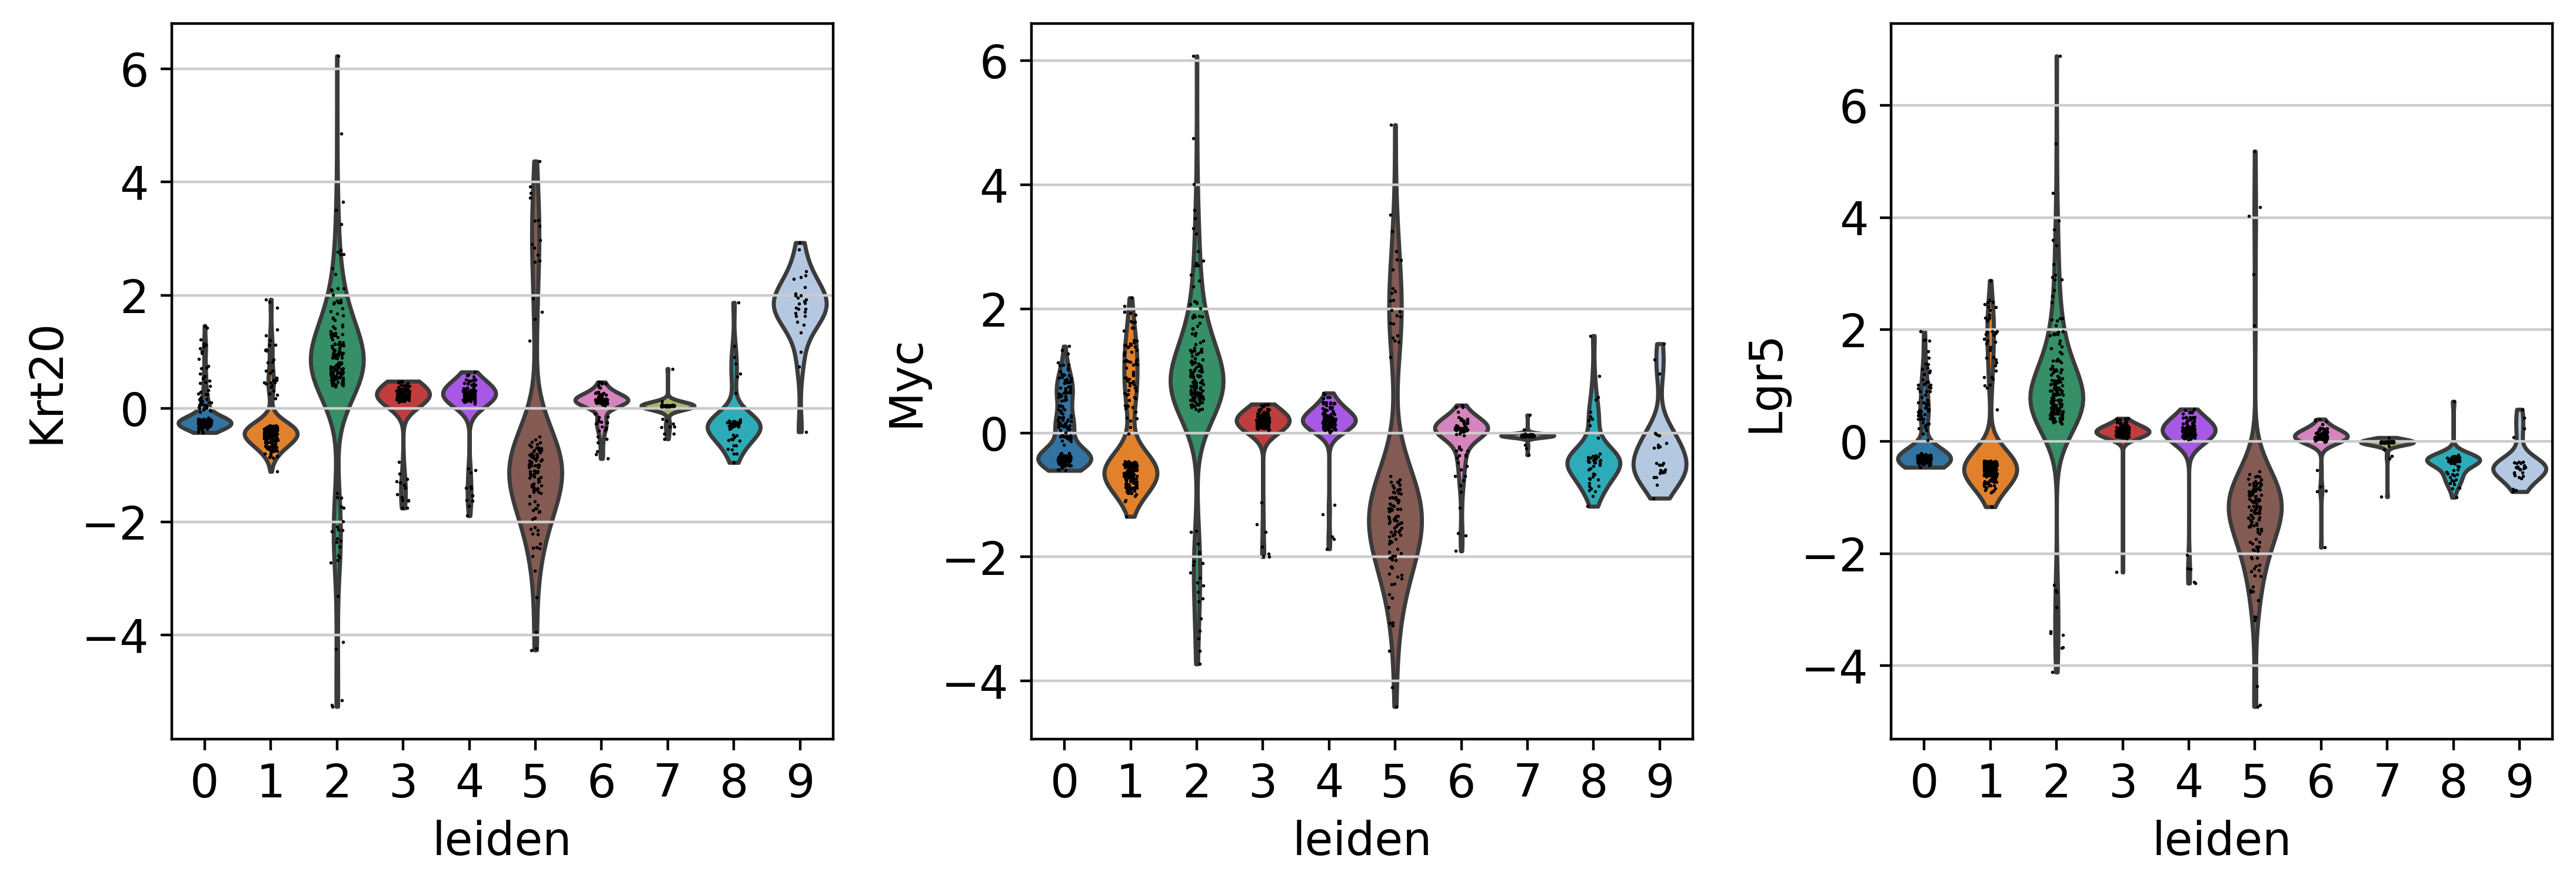

In [32]:
sc.pl.violin(adata, keys=['Krt20','Myc','Lgr5'], groupby='leiden', use_raw=False)

In [ ]:
adata

AnnData object with n_obs × n_vars = 1206 × 25507
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden'
    var: 'mean', 'std', 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [33]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0         1        2       3        4        5              6  \
0      Ptma      Noct   Tyrobp    Ctss   S100a9  Unc93b1  0610007P14Rik   
1      Noct      Nkd1       Hp    Mafb   Retnlg   Tmsb4x           Igkc   
2  Hsp90ab1     Wdr31     Lyz2   H2-Aa   S100a8   Arpc1b         Jchain   
3      Ppia  Hsp90ab1      Emb   Csf1r     Il1b    Cotl1           Pkn2   
4    Eef1a1      Sox4   Lilra6  S100a4    Cxcl2    Mpeg1           Tff1   
5     Prdx1    Ifitm3  Arhgdib    Cd74      Hdc     Lrp1          Ermap   
6     Wdr31      Tcf4   Retnlb  Fcgr2b     Srgn      Grn        Pla2g4c   
7       Set    Spock2    Gpsm3    C1qa     Cd14     Ctss        Slc7a14   
8     H3f3b     Krt18   Coro1a   Runx3  Alox5ap     Lyz2         Chmp4c   
9    Rpl27a      Wif1     Ccl6    Apoe     G0s2    Tgfbi           Igha   

               7         8              9  
0         Hbb-bs    Igfbp7          Plac8  
1           Ccny     Sparc           Muc3  
2         Hba-a2    Col4a2  2200002D01Rik  
3         Hbb-bt    Col4a1          Cdhr5  
4        Olfr807     Epas1         Lgals4  
5          Ntng1  Serpinh1      Serpinb1a  
6         Ube2l6      Mcam          Lypd8  
7          Alas2     Fstl1          Prdx6  
8  4930583K01Rik    Tm4sf1          Dmbt1  
9         Hba-a1   Col18a1         Lgals3

In [34]:
#Subsetting and slicing

In [35]:
#Cell-wise / Obs-wise subsetting

In [36]:
adata[:10] #first 10

View of AnnData object with n_obs × n_vars = 10 × 25507
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden'
    var: 'mean', 'std', 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [37]:
adata[10:100] #between 10-100

View of AnnData object with n_obs × n_vars = 90 × 25507
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden'
    var: 'mean', 'std', 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [38]:
random_idx = np.random.randint(0,1000,500) #choose 500 cells between indices 0-1000
adata[random_idx]

View of AnnData object with n_obs × n_vars = 500 × 25507
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden'
    var: 'mean', 'std', 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [39]:
#Subsetting feature/variable metadata

In [40]:
adata.var[adata.var['Mitochondrial']] #look at just the mitochondrial subset of variables

mean       std  Mitochondrial  n_cells_by_counts  mean_counts  \
mt-Atp6  0.305830  1.294407           True               1145    48.270313   
mt-Atp8  0.116496  1.379106           True                426     0.791045   
mt-Co1   0.311594  1.256253           True               1142    41.267826   
mt-Co2   0.290552  1.258412           True               1171    55.461029   
mt-Co3   0.325374  1.289662           True               1077    27.914595   
mt-Cytb  0.282906  1.296866           True               1155    33.297680   
mt-Nd1   0.347861  1.287126           True               1086    22.940298   
mt-Nd2   0.325220  1.298110           True               1063    16.437811   
mt-Nd3   0.301054  1.357175           True                942     7.398010   
mt-Nd4   0.299165  1.314710           True               1079    22.759535   
mt-Nd4l  0.133033  1.405116           True                522     1.180763   
mt-Nd5   0.218947  1.393293           True                877     4.321725   
mt-Nd6   0.041540  0.695396           True                 31     0.029022   

         log1p_mean_counts  pct_dropout_by_counts  total_counts  \
mt-Atp6           3.897322               5.058043       58214.0   
mt-Atp8           0.582799              64.676617         954.0   
mt-Co1            3.744026               5.306799       49769.0   
mt-Co2            4.033551               2.902156       66886.0   
mt-Co3            3.364347              10.696517       33665.0   
mt-Cytb           3.535078               4.228856       40157.0   
mt-Nd1            3.175563               9.950249       27666.0   
mt-Nd2            2.858641              11.857380       19824.0   
mt-Nd3            2.127995              21.890547        8922.0   
mt-Nd4            3.167984              10.530680       27448.0   
mt-Nd4l           0.779675              56.716418        1424.0   
mt-Nd5            1.671798              27.280265        5212.0   
mt-Nd6            0.028608              97.429519          35.0   

         log1p_total_counts  
mt-Atp6           10.971898  
mt-Atp8            6.861712  
mt-Co1            10.815167  
mt-Co2            11.110760  
mt-Co3            10.424244  
mt-Cytb           10.600577  
mt-Nd1            10.227996  
mt-Nd2             9.894699  
mt-Nd3             9.096388  
mt-Nd4            10.220085  
mt-Nd4l            7.261927  
mt-Nd5             8.558910  
mt-Nd6             3.583519

In [41]:
adata.obs_vector('mt-Atp6') #get all values of a particular variable/feature across cells

array([-0.07542589, -0.11163805, -0.39090976, ...,  0.6301687 ,
        0.69701123, -0.10839948], dtype=float32)

In [72]:
adata = sc.read_h5ad('single-cell-lectures/data/GSM3305227_Tumor_1_Full.h5ad')
adata.raw = adata.copy()
adata.X
adata
sc.pp.normalize_total(adata)
adata.X = np.arcsinh(adata.X).copy()
sc.pp.scale(adata)

In [47]:
adata.var[:10]

Empty DataFrame
Columns: []
Index: [0610006L08Rik, 0610007P14Rik, 0610009B22Rik, 0610009E02Rik, 0610009L18Rik, 0610009O20Rik, 0610010F05Rik, 0610010K14Rik, 0610011F06Rik, 0610012D04Rik]

In [73]:
adata[1:10]
adata1 = adata

In [74]:
adata1.var['Mitochondrial'] = adata.var.index.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata,qc_vars=['Mitochondrial'],use_raw=True,inplace=True)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


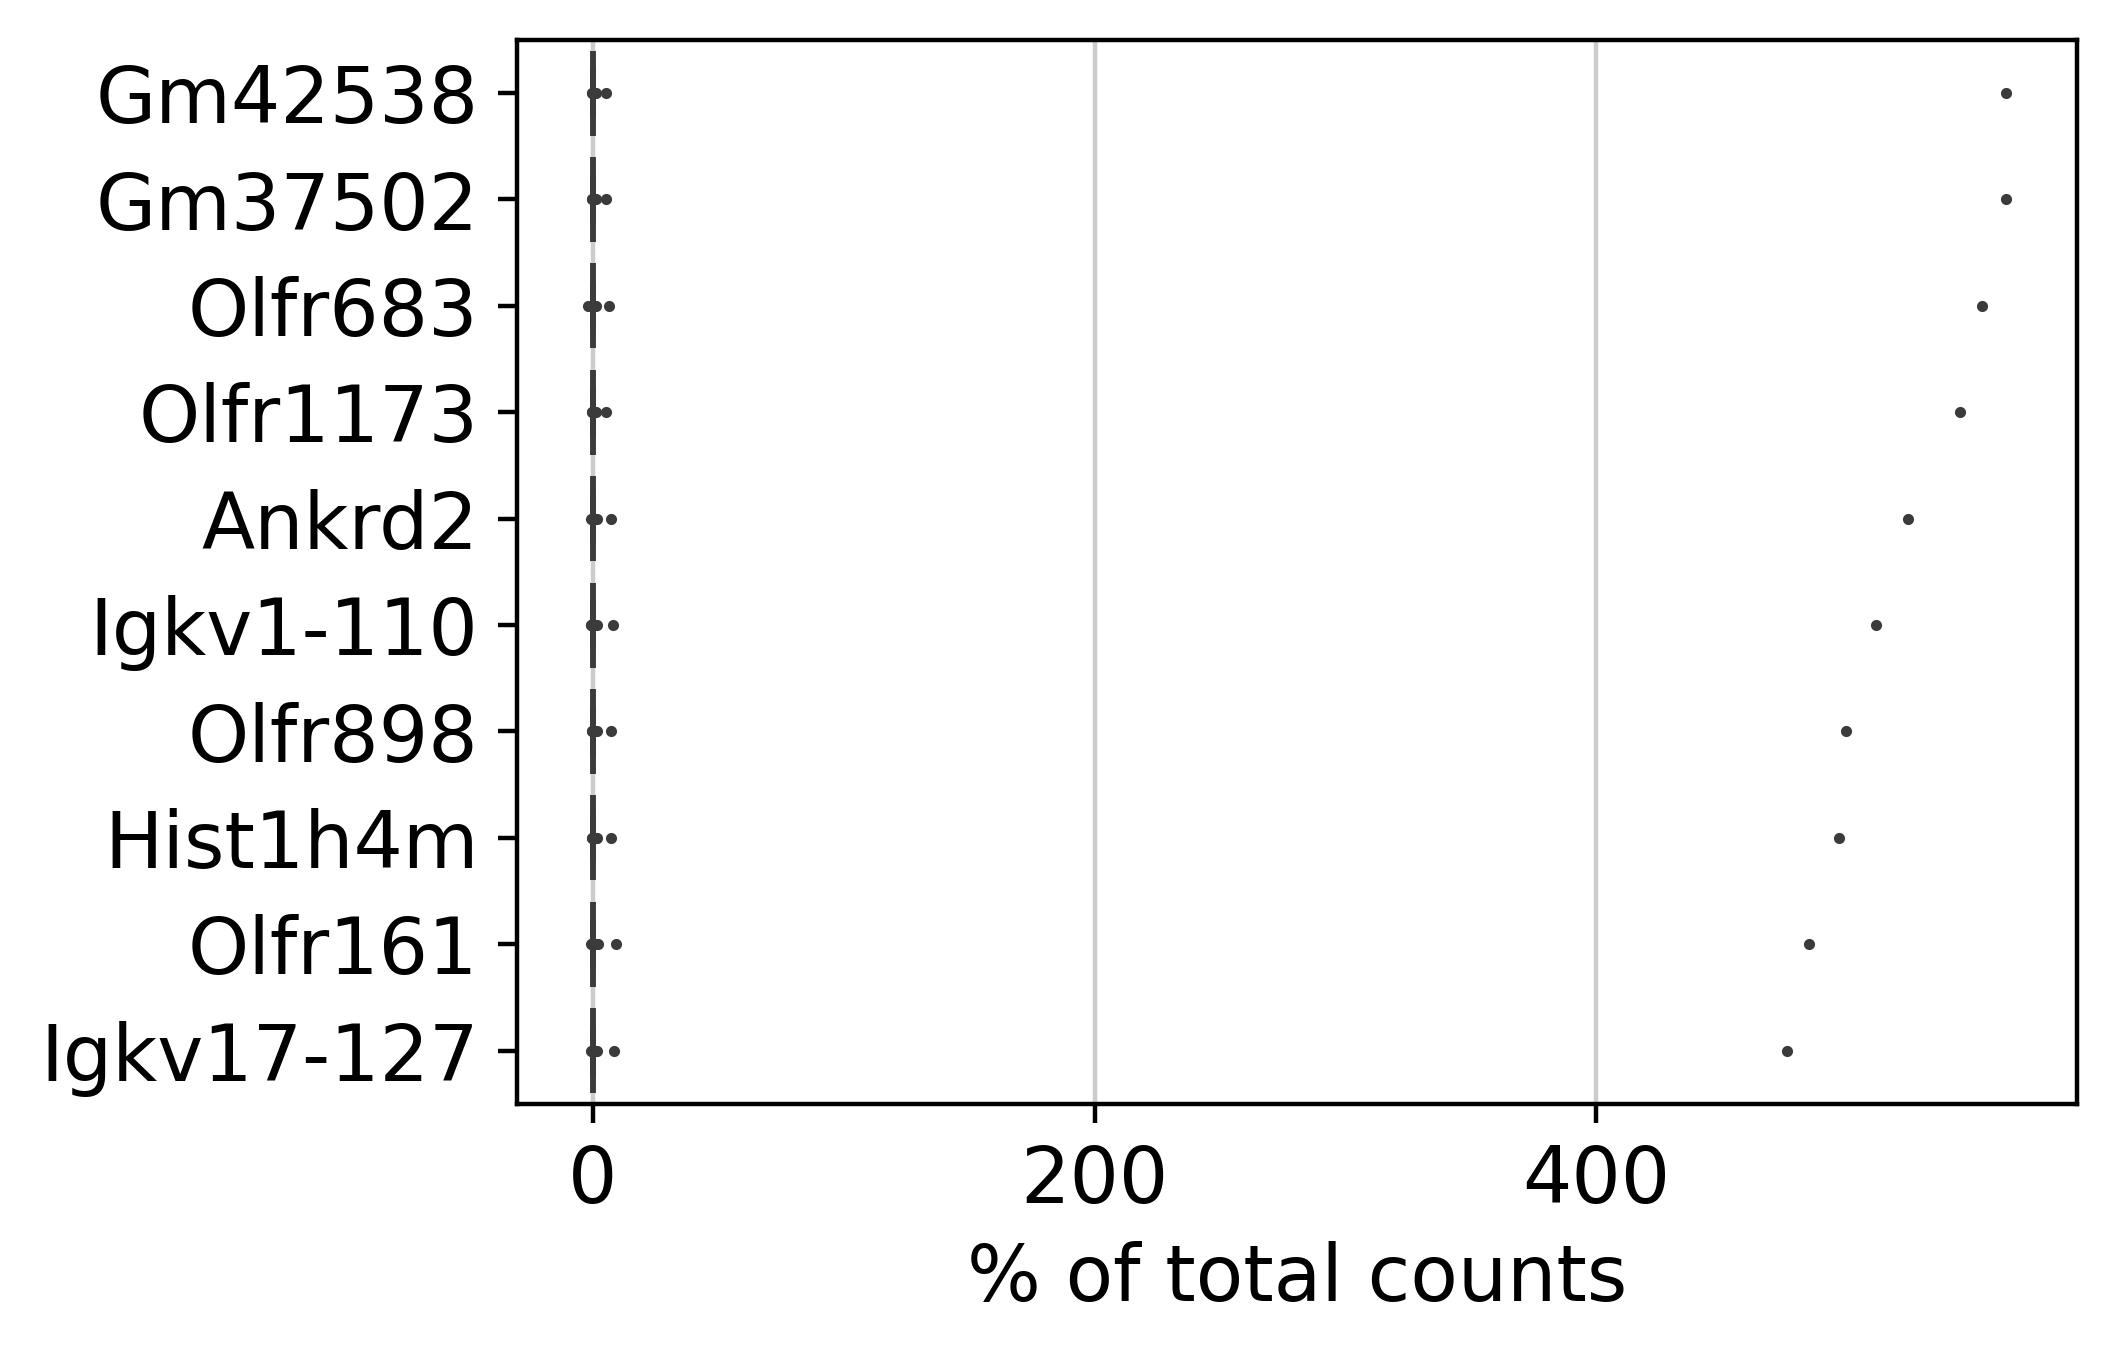

In [75]:
sc.pl.highest_expr_genes(adata1, n_top=10, show=None, save=None, ax=None, gene_symbols=None, log=False)